In [69]:
import numpy as np
from sklearn.preprocessing import StandardScaler

height = width = 28
IMAGE_PATH = "ml2018spring-hw4-v2/image.npy"
TEST_CASE_PATH = "ml2018spring-hw4-v2/test_case.csv"
OUTPUT_PATH = "output.csv"

In [2]:
import matplotlib.pyplot as plt
% matplotlib inline

## Load data

In [3]:
# Load training data
X_train = np.load(IMAGE_PATH)

In [57]:
# Load test case
with open(TEST_CASE_PATH, 'r') as file:
    content = file.read().strip('\n').replace(',', ' ').split()[3:]
    X_test = []
    for i in range(0, len(content), 3):
        X_test.append((content[i+1], content[i+2]))
        
    X_test = np.array(X_test).astype("int")

## Hand-craft PCA

In [ ]:
# Standarization
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)

# Covariance matrix
cov_mat = np.cov(X_train_std.T)
# Eigenvalues and Eigenvectors
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# Plot principal components 
eigen_vals_sum = np.sum(eigen_vals)
eigen_vals_frac = [i / eigen_vals_sum for i in sorted(eigen_vals, reverse=True)]
eigen_vals_cum = np.cumsum(eigen_vals_frac)

plt.bar(range(0, len(eigen_vals_frac)), eigen_vals_frac, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(0, len(eigen_vals_cum)), eigen_vals_cum, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Sort eigenvalues
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

# Get reduction dimension
cum_bound = 0.8
for key, value in enumerate(eigen_vals_cum):
    if value >= 0.8:
        cum_index = key
        break
        
# Projection matrix
w = []
for i in range(cum_index): 
    w.append(eigen_pairs[i][1])
w = np.array(w)

# Dimension reduction
X_train_pca = np.dot(w, X_train.T)
X_train_pca = X_train_pca.T

## PCA: dimension reduction

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)

## t-SNE

In [5]:
# t-SNE
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, n_iter=250).fit_transform(X_train_pca)

In [73]:
np.save("X_embedded", X_embedded)

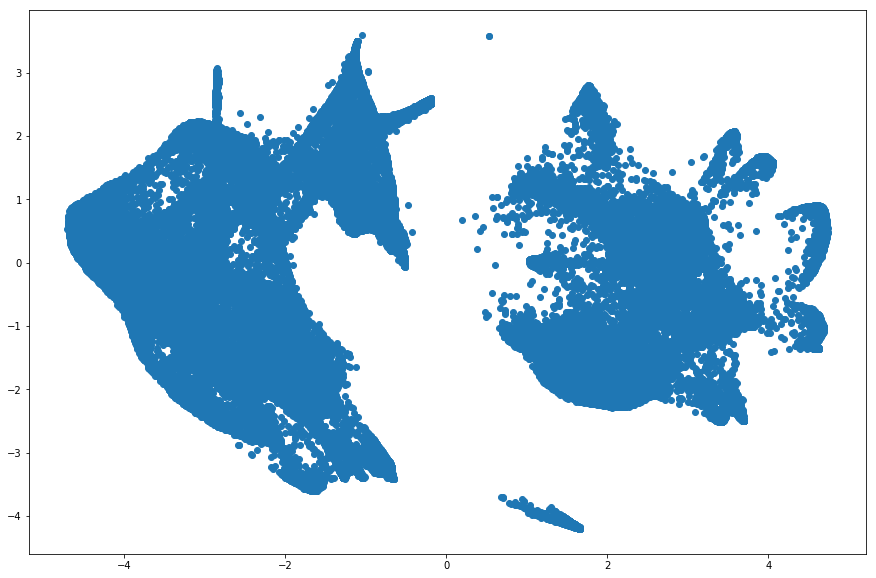

In [6]:
plt.figure(figsize=(15, 10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.show()

## K-means clustering

In [7]:
# k-means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_embedded)
X_embedded_labels = kmeans.labels_

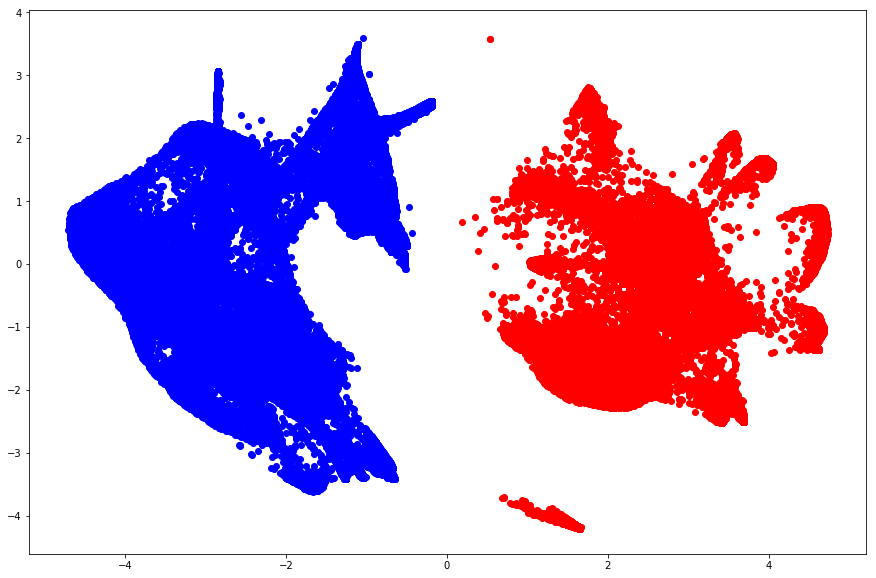

In [10]:
plt.figure(figsize=(15, 10))
plt.scatter(X_embedded[X_embedded_labels == 0][:, 0], X_embedded[X_embedded_labels == 0][:, 1], c='r')
plt.scatter(X_embedded[X_embedded_labels == 1][:, 0], X_embedded[X_embedded_labels == 1][:, 1], c='b')
plt.show()

In [59]:
# Output to file
output = []
for i, j in X_test:
    if X_embedded_labels[i] == X_embedded_labels[j]:
        output.append(1)
    else:
        output.append(0)

with open(OUTPUT_PATH, 'w') as file:
    file.write("ID,Ans\n")
    file.write('\n'.join(['{},{}'.format(index, element) for index, element in enumerate(output)]))